In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\HP\Downloads\Telcom_Customer_Churn_(1).csv")

In [3]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
train.isna().sum().sum()

0

In [6]:
train.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
columns = train.columns
binary_cols = []
for col in columns:
    if train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)


In [8]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

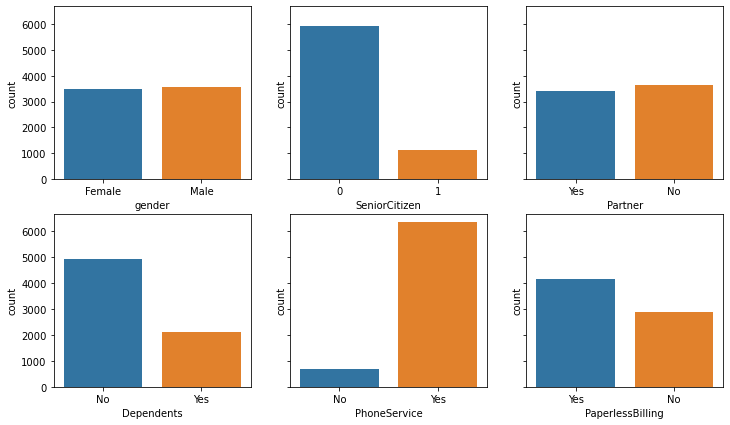

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=train, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=train, ax=axes[0,1])
sns.countplot("Partner", data=train, ax=axes[0,2])
sns.countplot("Dependents", data=train, ax=axes[1,0])
sns.countplot("PhoneService", data=train, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=train, ax=axes[1,2])


In [10]:
churn_numeric = {'Yes':1, 'No':0}
train.Churn.replace(churn_numeric, inplace=True)

In [11]:
churn_numeric

{'Yes': 1, 'No': 0}

In [12]:
train[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [13]:
train[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [14]:
train[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [15]:
train[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [16]:
train[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [17]:
train[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [18]:
table = pd.pivot_table(train, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)


In [19]:
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [20]:
table1 = pd.pivot_table(train, values='Churn', index=['gender'],
                    columns=['Partner'], aggfunc=np.mean)


In [21]:
table1

Partner,No,Yes
gender,,
Female,0.344444,0.188981
Male,0.315046,0.204201


In [22]:
table2 = pd.pivot_table(train, values='Churn', index=['gender'],
                    columns=['PhoneService'], aggfunc=np.mean)

In [23]:
table2

PhoneService,No,Yes
gender,,
Female,0.241692,0.272094
Male,0.256410,0.262172


In [24]:
table3 = pd.pivot_table(train, values='Churn', index=['gender'],
                    columns=['Dependents'], aggfunc=np.mean)

In [25]:
table3

Dependents,No,Yes
gender,,
Female,0.314634,0.160506
Male,0.310958,0.148799


In [26]:
table4 = pd.pivot_table(train, values='Churn', index=['gender'],
                    columns=['PaperlessBilling'], aggfunc=np.mean)

In [27]:
table4

PaperlessBilling,No,Yes
gender,,
Female,0.171184,0.335091
Male,0.155782,0.336211


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

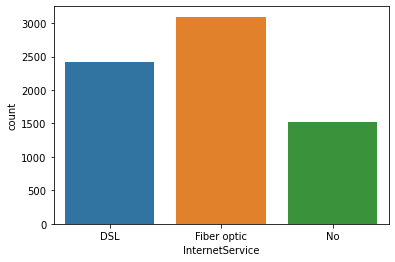

In [28]:
sns.countplot("InternetService", data=train)

In [29]:
train[['InternetService', 'Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

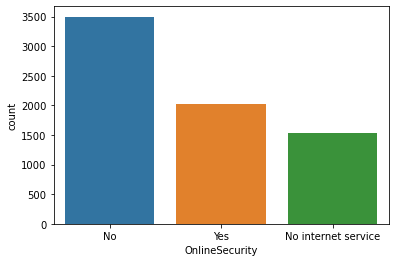

In [30]:
sns.countplot("OnlineSecurity", data=train)

In [31]:
train[['OnlineSecurity', 'Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

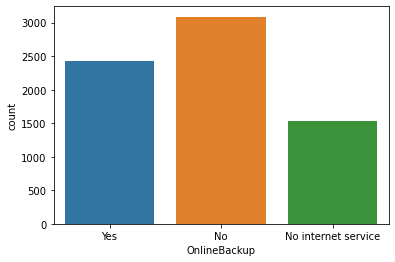

In [32]:
sns.countplot("OnlineBackup", data=train)

In [33]:
train[['OnlineBackup', 'Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

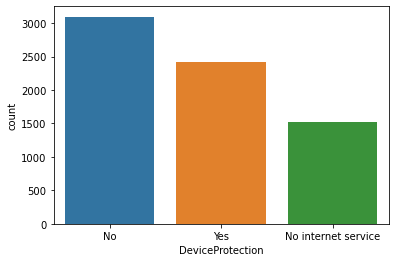

In [34]:
sns.countplot("DeviceProtection", data=train)

In [35]:
train[['DeviceProtection', 'Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

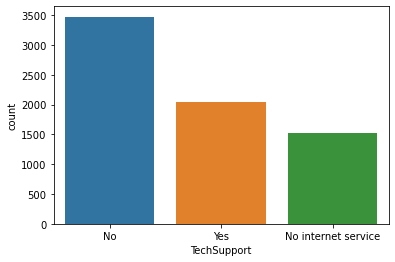

In [36]:
sns.countplot("TechSupport", data=train)

In [37]:
train[['TechSupport', 'Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

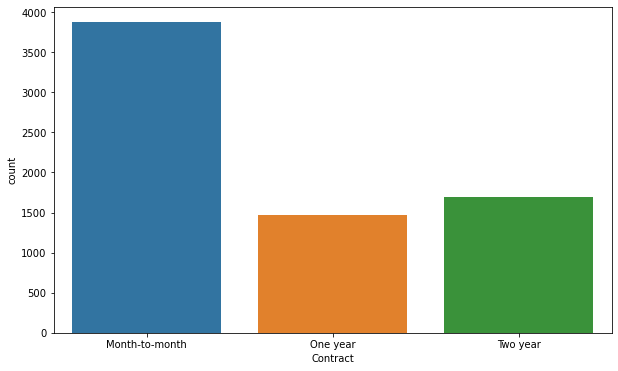

In [38]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=train)

In [39]:
train[['Contract', 'Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

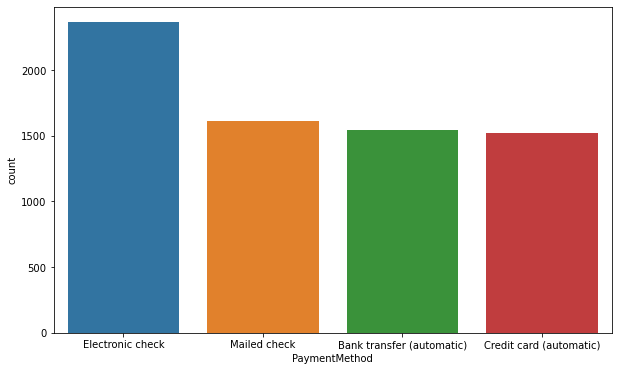

In [40]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=train)

In [41]:
train[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

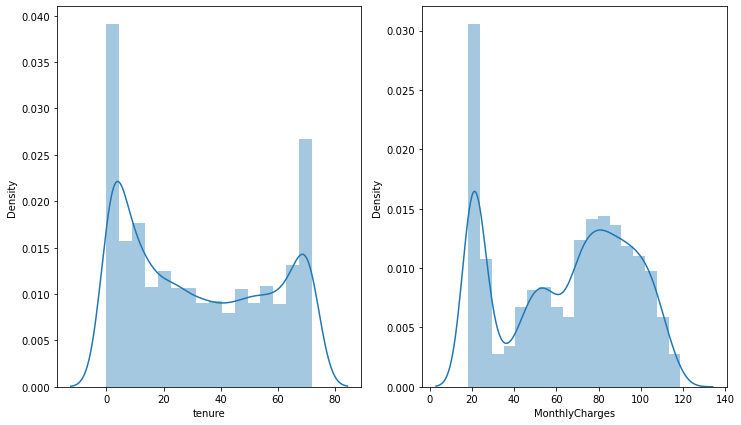

In [42]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(train["tenure"], ax=axes[0])
sns.distplot(train["MonthlyCharges"], ax=axes[1])

In [43]:
train[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [44]:
train[['tenure', 'Contract', 'Churn']].groupby('Contract').mean()

,tenure,Churn
Contract,,
Month-to-month,18.036645,0.427097
One year,42.044807,0.112695
Two year,56.735103,0.028319


In [45]:
#Data Processing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [46]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(train, columns=cat_features, drop_first=True)

In [47]:
sc = MinMaxScaler()
a = sc.fit_transform(train[['tenure']])
b = sc.fit_transform(train[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [48]:
X.shape

(7043, 31)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

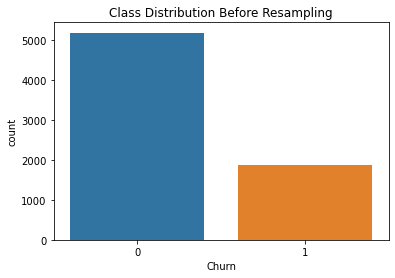

In [49]:
sns.countplot('Churn', data=train).set_title('Class Distribution Before Resampling')

In [50]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [51]:
X_no

,customerID,gender,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0.013889,No,Month-to-month,0.115423,29.85,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,Male,0.472222,Yes,One year,0.385075,1889.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0.625000,No,One year,0.239303,1840.75,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1452-KIOVK,Male,0.305556,Yes,Month-to-month,0.704975,1949.4,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7,6713-OKOMC,Female,0.138889,No,Month-to-month,0.114428,301.9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,1.000000,Yes,Two year,0.028856,1419.4,0,0,0,...,1,0,1,0,1,0,1,0,0,0
7038,6840-RESVB,Male,0.333333,Yes,One year,0.662189,1990.5,0,0,1,...,0,1,0,1,0,1,1,0,0,1
7039,2234-XADUH,Female,1.000000,Yes,One year,0.845274,7362.9,0,0,1,...,0,0,0,1,0,1,1,1,0,0
7040,4801-JZAZL,Female,0.152778,No,Month-to-month,0.112935,346.45,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [52]:
X_yes

,customerID,gender,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,Male,0.027778,Yes,Month-to-month,0.354229,108.15,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,9237-HQITU,Female,0.027778,Yes,Month-to-month,0.521891,151.65,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,9305-CDSKC,Female,0.111111,Yes,Month-to-month,0.809950,820.5,1,0,0,...,0,0,0,1,0,1,1,0,1,0
8,7892-POOKP,Female,0.388889,Yes,Month-to-month,0.861194,3046.05,1,0,1,...,0,1,0,1,0,1,1,0,1,0
13,0280-XJGEX,Male,0.680556,Yes,Month-to-month,0.850249,5036.3,1,0,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0.166667,Yes,One year,0.413433,727.8,1,0,0,...,0,1,0,1,0,0,1,0,1,0
7026,8775-CEBBJ,Female,0.125000,Yes,Month-to-month,0.258209,403.35,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7032,6894-LFHLY,Male,0.013889,Yes,Month-to-month,0.572139,75.75,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7034,0639-TSIQW,Female,0.930556,Yes,Month-to-month,0.842786,6886.25,1,0,0,...,0,0,0,1,0,0,1,1,0,0


In [53]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)

In [54]:
print(len(X_yes_upsampled))

5174


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

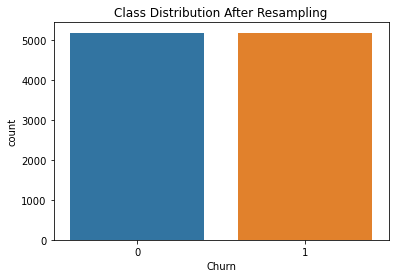

In [55]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [56]:
#model creation and evaluation

from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [58]:
X_train

,customerID,gender,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4541,2220-IAHLS,Female,0.013889,Yes,Month-to-month,0.011443,19.4,0,0,0,...,1,0,1,0,1,0,0,1,0,0
5709,5914-DVBWJ,Female,0.250000,Yes,Month-to-month,0.668657,1505.85,1,0,0,...,0,1,0,0,0,0,1,0,1,0
7393,3669-LVWZB,Male,0.069444,No,Month-to-month,0.325871,305.95,0,0,0,...,0,0,0,1,0,1,1,0,0,1
10026,2884-GBPFB,Female,0.486111,Yes,Month-to-month,0.517910,2416.55,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3578,8993-IZEUX,Male,0.097222,Yes,Month-to-month,0.506468,488.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1254-IZEYF,Female,0.430556,Yes,Month-to-month,0.812935,3186.65,1,0,0,...,0,0,0,1,0,1,1,0,1,0
5191,1513-XNPPH,Female,0.166667,Yes,Month-to-month,0.707960,1095.65,0,0,0,...,0,1,0,0,0,1,1,0,1,0
5390,2446-BEGGB,Female,0.083333,Yes,Month-to-month,0.796020,560.6,1,0,0,...,0,0,0,1,0,1,1,0,1,0
860,9359-UGBTK,Female,0.930556,Yes,One year,0.538308,4991.5,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [59]:
X_test

,customerID,gender,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,2691-NZETQ,Male,0.125000,Yes,Month-to-month,0.667662,758.6,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4593,7054-DMVAS,Male,0.750000,Yes,Two year,0.468159,3512.9,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5379,3070-DVEYC,Male,0.097222,Yes,Month-to-month,0.552239,545.15,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8918,3374-LXDEV,Female,0.180556,Yes,Month-to-month,0.707960,1132.35,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6448,0256-LTHVJ,Female,0.388889,Yes,Month-to-month,0.624876,2227.1,0,1,1,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,0689-NKYLF,Male,0.180556,Yes,Month-to-month,0.646269,1060.6,0,0,0,...,0,0,0,1,0,0,1,0,1,0
766,2632-TACXW,Female,0.861111,Yes,Two year,0.053731,1416.75,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1144,6518-KZXCB,Male,0.305556,Yes,Two year,0.069652,566.5,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3065,8874-EJNSR,Male,0.541667,Yes,Two year,0.069154,987.95,0,1,1,...,1,0,1,0,1,0,0,0,0,1


In [63]:
y_train

4541     0
5709     1
7393     1
10026    1
3578     0
        ..
5734     1
5191     1
5390     1
860      0
7270     1
Name: Churn, Length: 8278, dtype: int64

In [65]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score


In [66]:
y_test

9428    1
4593    0
5379    1
8918    1
6448    1
       ..
6425    1
766     0
1144    0
3065    0
7073    1
Name: Churn, Length: 2070, dtype: int64